---
# Netflix Content Analysis Report
**Date**: November 2025  
**Dataset**: Netflix Content Library  
**Analysis Type**: Exploratory Data Analysis  
---

In [12]:
# Set up plot configurations for PDF export
import matplotlib.pyplot as plt

# Configure plot styling for better PDF output
plt.rcParams['figure.dpi'] = 300  # Higher DPI for better PDF quality
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['figure.titlesize'] = 16

## Executive Summary

This report analyzes Netflix's content library, examining trends in content additions, geographic distribution, and genre preferences. The analysis covers both movies and TV shows available on the platform.

## Key Findings

1. **Content Distribution**: The library contains both movies and TV shows, with movies forming the majority of content
2. **Release Patterns**: Clear seasonal and yearly trends in content additions
3. **Geographic Diversity**: Content from various countries, showing Netflix's global reach
4. **Genre Analysis**: Different genre preferences between movies and TV shows

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Add seaborn import here
from datetime import datetime

# Configure plot styling
plt.style.use('default')  # Use default style first
sns.set_theme()  # Apply seaborn theme

# Load the dataset
data = pd.read_csv('netflix1.csv')

In [6]:
# Verify data loading and quality
print("Data Quality Check:")
print("-----------------")
print(f"Number of rows: {len(data)}")
print(f"Number of columns: {len(data.columns)}")
print("\nMissing values check:")
missing = data.isnull().sum()
print(missing[missing > 0])

# Verify required columns exist
required_columns = ['type', 'date_added', 'release_year', 'country', 'listed_in']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print("\nWarning: Missing required columns:", missing_columns)
else:
    print("\nAll required columns present ✓")

Data Quality Check:
-----------------
Number of rows: 8790
Number of columns: 10

Missing values check:
Series([], dtype: int64)

All required columns present ✓


## 1. Dataset Overview

The analysis is based on Netflix's content library data, which includes information about:
- Content type (Movie/TV Show)
- Release year
- Date added to Netflix
- Content origin (country)
- Genre classifications
- Ratings

Let's examine the basic characteristics of our dataset:

Dataset Overview:
-----------------
Total number of titles: 8,790

Content Type Distribution:
type
Movie      6126
TV Show    2664
Name: count, dtype: int64


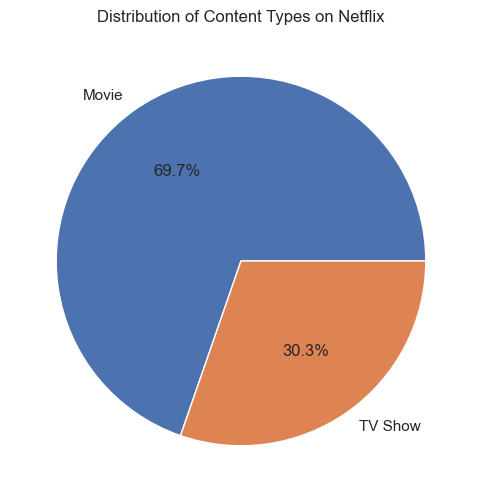

In [7]:
# Basic dataset information
print("Dataset Overview:")
print("-----------------")
print(f"Total number of titles: {len(data):,}")
print("\nContent Type Distribution:")
print(data['type'].value_counts())

# Create a pie chart of content distribution
plt.figure(figsize=(10, 6))
data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Content Types on Netflix')
plt.ylabel('')
plt.show()

## 2. Content Release Trends

We'll analyze how Netflix has been adding content over time. This includes:
- Monthly addition patterns
- Yearly growth trends
- Differences between Movies and TV Shows

First, let's prepare the date features:

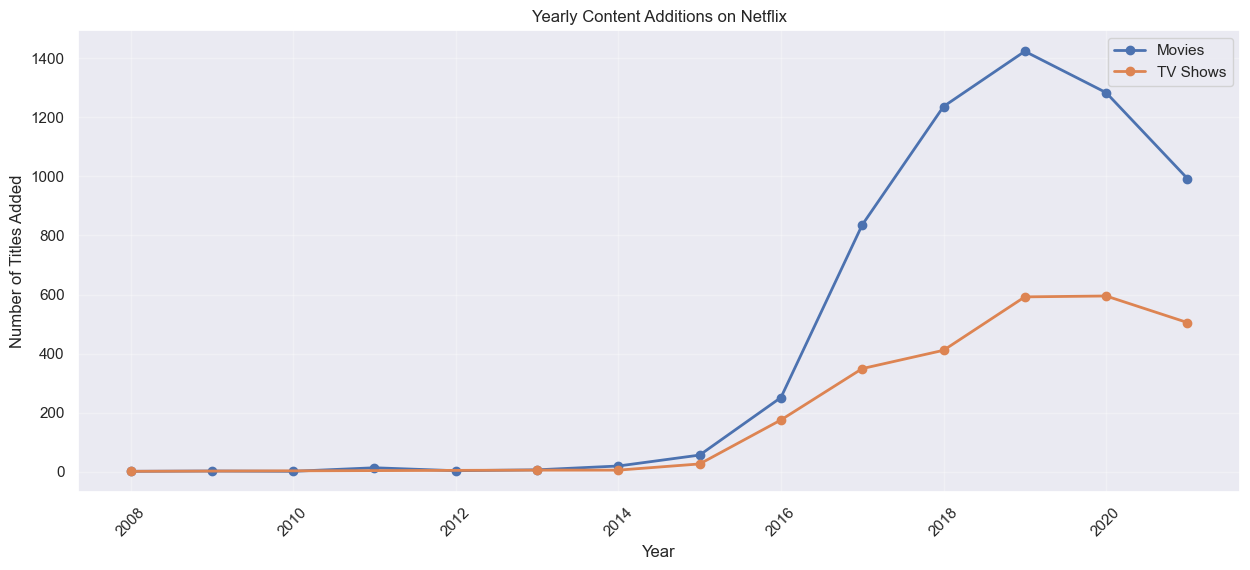

In [8]:
# Convert date_added to datetime and extract components
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Check for failed date conversions
failed_dates = data['date_added'].isnull().sum()
if failed_dates > 0:
    print(f"Warning: {failed_dates} dates could not be converted")

# Extract date components safely
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month

# Create yearly trend plots
plt.figure(figsize=(15, 6))
yearly_movie_releases = data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases = data[data['type']=='TV Show']['year'].value_counts().sort_index()

plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, 
         marker='o', label='Movies', linewidth=2)
plt.plot(yearly_series_releases.index, yearly_series_releases.values, 
         marker='o', label='TV Shows', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Yearly Content Additions on Netflix")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 3. Geographic Analysis

Netflix's content comes from various countries, showing its commitment to diverse, international programming. Let's analyze the geographic distribution of content:

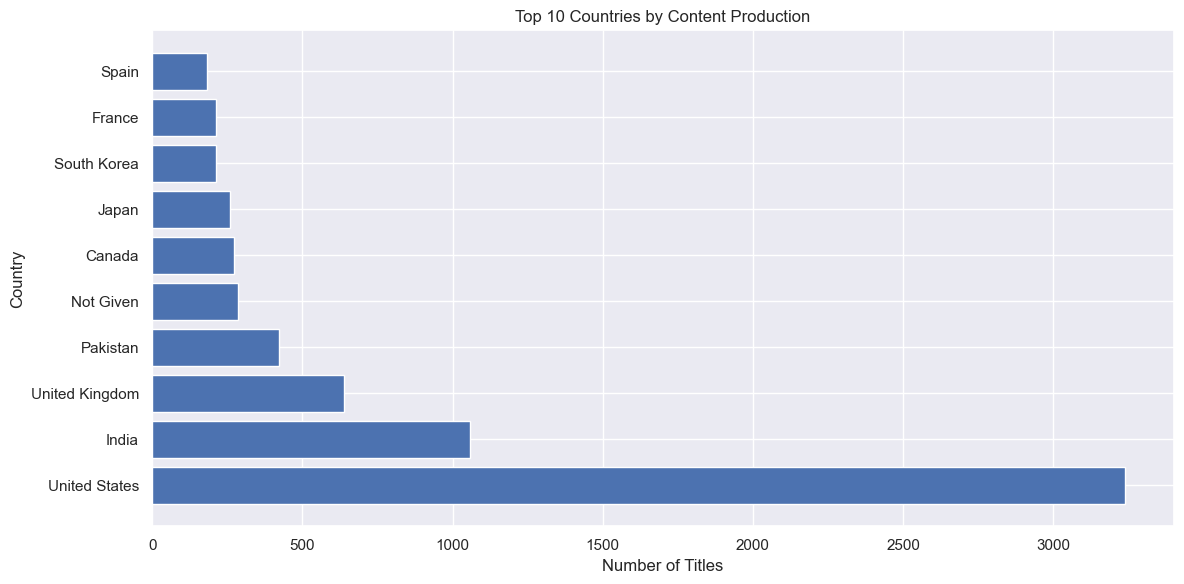


Geographic Distribution Statistics:
---------------------------------
Number of countries with content: 86

Top 5 countries by content volume:
United States: 3,240 titles
India: 1,057 titles
United Kingdom: 638 titles
Pakistan: 421 titles
Not Given: 287 titles


In [9]:
# Analyze top content producing countries
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
# Use matplotlib instead of seaborn for the bar plot
plt.barh(top_countries.index, top_countries.values)
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nGeographic Distribution Statistics:")
print("---------------------------------")
print(f"Number of countries with content: {data['country'].nunique()}")
print("\nTop 5 countries by content volume:")
for country, count in top_countries.head().items():
    print(f"{country}: {count:,} titles")

## 4. Genre Analysis

Finally, let's examine the distribution of genres across Netflix's content library. This analysis will reveal:
- Most popular genres overall
- Genre differences between Movies and TV Shows
- Trends in genre popularity

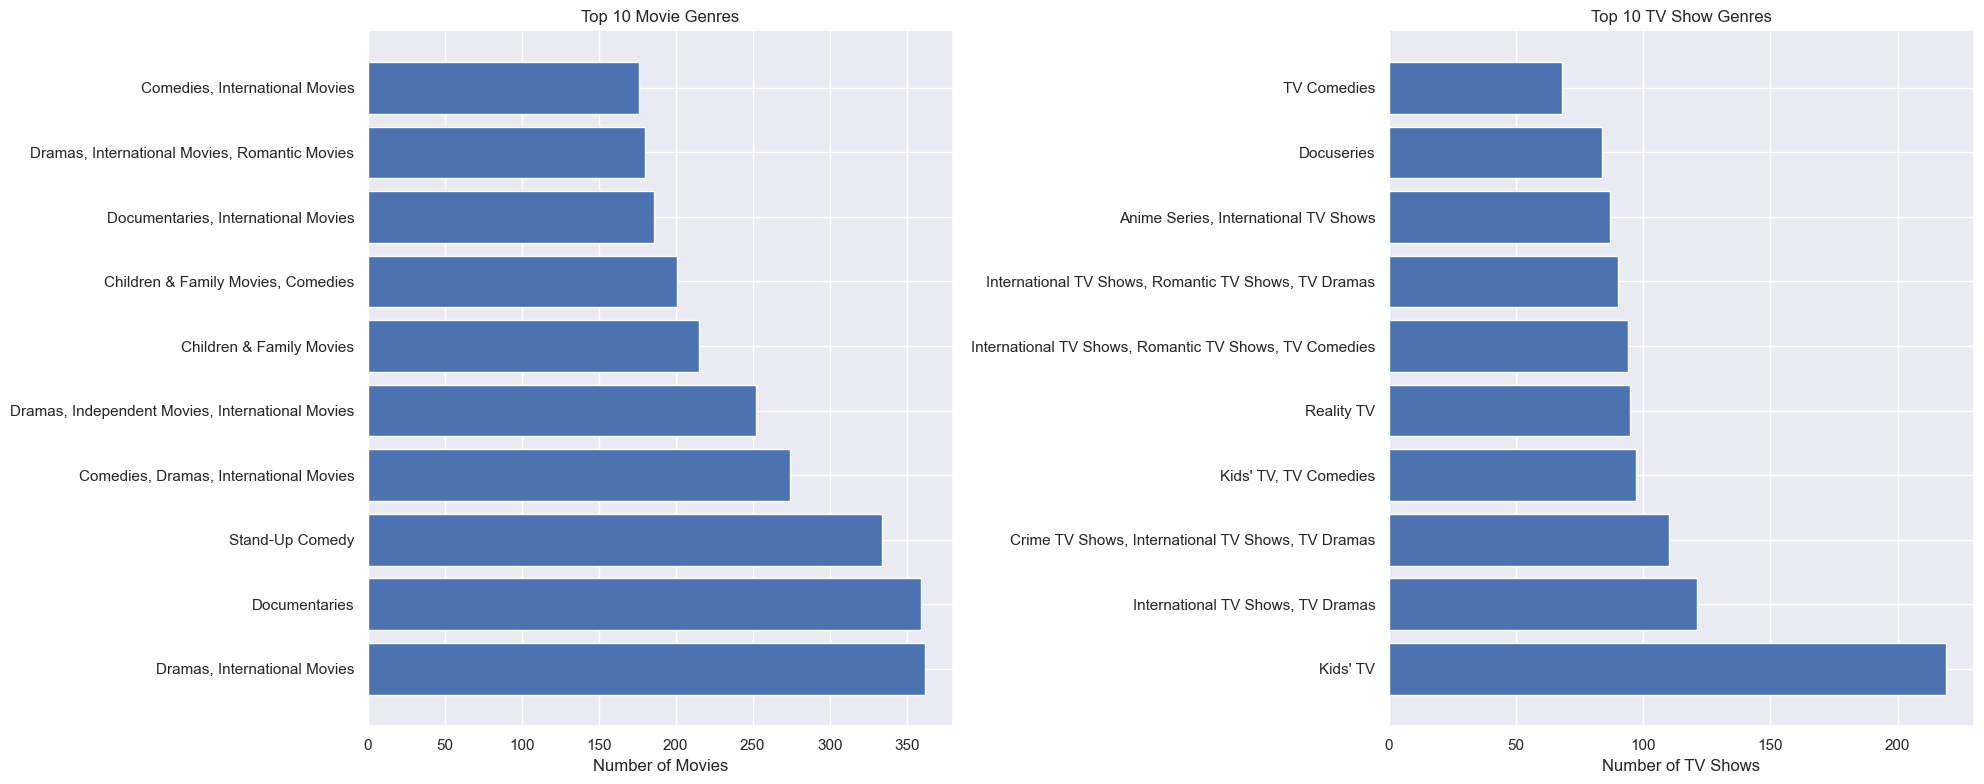


Genre Distribution Statistics:
----------------------------
Total unique genres: 513

Top 5 genres overall:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64


In [10]:
# Analyze genres
# Create subplots for Movies and TV Shows
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Movies analysis
movie_genres = data[data['type'] == 'Movie']['listed_in'].value_counts().head(10)
ax1.barh(movie_genres.index, movie_genres.values)
ax1.set_title('Top 10 Movie Genres')
ax1.set_xlabel('Number of Movies')

# TV Shows analysis
tv_genres = data[data['type'] == 'TV Show']['listed_in'].value_counts().head(10)
ax2.barh(tv_genres.index, tv_genres.values)
ax2.set_title('Top 10 TV Show Genres')
ax2.set_xlabel('Number of TV Shows')

plt.tight_layout()
plt.show()

# Print genre statistics
print("\nGenre Distribution Statistics:")
print("----------------------------")
print(f"Total unique genres: {data['listed_in'].nunique()}")
print("\nTop 5 genres overall:")
print(data['listed_in'].value_counts().head())

## Conclusions

Key insights from the analysis:

1. **Content Distribution**
   - Movies dominate the Netflix library
   - Significant presence of TV Shows, showing platform diversity

2. **Temporal Trends**
   - Steady increase in content additions over recent years
   - Different growth patterns for Movies vs TV Shows

3. **Geographic Insights**
   - Strong representation from multiple countries
   - US leads content production, followed by significant contributions from other regions

4. **Genre Patterns**
   - Distinct genre preferences between Movies and TV Shows
   - Strong presence of international content across various genres

This analysis demonstrates Netflix's evolution into a global content platform with diverse programming across different formats, regions, and genres.

---
### Report Notes

- Data processing performed using Python 3.x with pandas
- Visualizations created using matplotlib and seaborn
- All dates are in UTC
- Geographic analysis considers primary country of production
- Genre classifications are based on Netflix's categorization system

For questions or additional analysis, please contact the data analysis team.
---

In [11]:
# Final validation checks
print("Final Validation Report:")
print("----------------------")

# Check for required data
print("\n1. Data Completeness:")
print(f"Total rows processed: {len(data):,}")
print(f"Rows with valid dates: {data['date_added'].notna().sum():,}")
print(f"Rows with valid countries: {data['country'].notna().sum():,}")
print(f"Rows with valid genres: {data['listed_in'].notna().sum():,}")

# Verify content types
print("\n2. Content Types Check:")
content_types = data['type'].unique()
print(f"Found content types: {', '.join(content_types)}")

# Check plot data
print("\n3. Visualization Data Check:")
print(f"Years covered: {data['year'].min()} to {data['year'].max()}")
print(f"Number of countries plotted: {len(top_countries)}")
print(f"Number of genres analyzed: {len(movie_genres) + len(tv_genres)}")

print("\nValidation complete ✓")

Final Validation Report:
----------------------

1. Data Completeness:
Total rows processed: 8,790
Rows with valid dates: 8,790
Rows with valid countries: 8,790
Rows with valid genres: 8,790

2. Content Types Check:
Found content types: Movie, TV Show

3. Visualization Data Check:
Years covered: 2008 to 2021
Number of countries plotted: 10
Number of genres analyzed: 20

Validation complete ✓
